In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
# Import essential libraries
import numpy as np # for numeric calculation
import pandas as pd # for data manupulation or analysis
import matplotlib.pyplot as plt # for data Visualization
import seaborn as sns # for data Visualization
from sklearn.model_selection import train_test_split # for splitting the data for training and testing 
from sklearn.preprocessing import StandardScaler # for converting different units and magnitude data in one unit
from sklearn.metrics import classification_report # for classification report of the ML Model
from sklearn.metrics import accuracy_score # to find the accurate score of ML model
from sklearn.metrics import confusion_matrix # to find the ML model is giving best output
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbour Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier

In [3]:
Cancer_dataset = pd.read_csv("C:/Users/karti/DM PROJ/cancerdata.csv")

In [4]:
Cancer_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,927241,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609


In [5]:
print(type(Cancer_dataset))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(Cancer_dataset.keys())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [7]:
Cancer_dataset.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483
5,843786,M,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,...,15.47,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922
6,844359,M,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,...,22.88,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428


In [8]:
Cancer_dataset.tail(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
562,925622,M,15.362088,23.395916,103.40,716.9,0.096347,0.216130,0.062905,0.046674,...,17.520,42.79,128.70,915.0,0.14170,0.329496,1.1700,0.153819,0.4089,0.083204
563,926125,M,9.989657,14.959439,143.00,1347.0,0.095120,0.223011,0.108771,0.029735,...,24.290,29.41,179.10,1819.0,0.14070,0.242927,0.6599,0.024528,0.2929,0.053509
564,926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,927241,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609
568,92751,B,13.256191,25.087474,47.92,181.0,0.110289,0.044248,-0.072171,0.029954,...,9.456,30.37,59.16,268.6,0.08996,0.389369,0.0000,0.192663,0.2871,0.062577


In [9]:
print(Cancer_dataset.diagnosis) #target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [10]:
Target_Variables = Cancer_dataset.diagnosis #target variables

In [11]:
print(Target_Variables)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [12]:
t = []
for i in Target_Variables:
    if(i == "M"):
        t.append(0)
    else:
        t.append(1)

In [13]:
Target = t
print(Target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

In [14]:
print(Cancer_dataset.T.describe)

<bound method NDFrame.describe of                                 0            1           2           3    \
id                           842302       842517    84300903    84348301   
diagnosis                         M            M           M           M   
radius_mean                 14.2047      18.4835     15.5163     15.5406   
texture_mean                20.2026      22.4642     18.2715     27.5601   
perimeter_mean                122.8        132.9         130       77.58   
area_mean                      1001         1326        1203       386.1   
smoothness_mean           0.0961128     0.094443   0.0758419   0.0915252   
compactness_mean          0.0894787    0.0632994   0.0593763   0.0880219   
concavity_mean             0.184766    0.0869274    0.132738    0.194466   
concave points_mean        0.096526    0.0211082   0.0523567   0.0108947   
symmetry_mean              0.150053     0.213798    0.222581    0.179685   
fractal_dimension_mean    0.0597635    0.0748969   0.0

In [25]:
Feature_Variables = Cancer_dataset.drop(['id', 'diagnosis'], axis = 1)

In [26]:
print(Feature_Variables)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      14.204716     20.202641          122.80     1001.0         0.096113   
1      18.483496     22.464181          132.90     1326.0         0.094443   
2      15.516300     18.271486          130.00     1203.0         0.075842   
3      15.540583     27.560108           77.58      386.1         0.091525   
4      14.005198     11.678064          135.10     1297.0         0.092790   
..           ...           ...             ...        ...              ...   
564     9.477218     17.173224          142.00     1479.0         0.110550   
565    11.657306     25.502865          131.20     1261.0         0.113881   
566    20.102883     14.544119          108.30      858.1         0.100213   
567    16.206551     19.616466          140.10     1265.0         0.112486   
568    13.256191     25.087474           47.92      181.0         0.110289   

     compactness_mean  concavity_mean  concave points_mean  sym

In [27]:
Cancer_df = pd.DataFrame(np.c_[Feature_Variables, Target], columns = np.append(Feature_Variables.columns, ['target']))

In [28]:
print(Cancer_df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      14.204716     20.202641          122.80     1001.0         0.096113   
1      18.483496     22.464181          132.90     1326.0         0.094443   
2      15.516300     18.271486          130.00     1203.0         0.075842   
3      15.540583     27.560108           77.58      386.1         0.091525   
4      14.005198     11.678064          135.10     1297.0         0.092790   
..           ...           ...             ...        ...              ...   
564     9.477218     17.173224          142.00     1479.0         0.110550   
565    11.657306     25.502865          131.20     1261.0         0.113881   
566    20.102883     14.544119          108.30      858.1         0.100213   
567    16.206551     19.616466          140.10     1265.0         0.112486   
568    13.256191     25.087474           47.92      181.0         0.110289   

     compactness_mean  concavity_mean  concave points_mean  sym

In [29]:
print(Cancer_df.keys())

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'target'],
      dtype='object')


In [30]:
Cancer_df.head(7)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,...,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594,0.0
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,...,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397,0.0
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,...,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802,0.0
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,...,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210,0.0
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,...,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483,0.0
5,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,0.227180,0.065421,...,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922,0.0
6,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,0.179330,0.065234,...,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428,0.0


In [31]:
Cancer_df.tail(7)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
562,15.362088,23.395916,103.40,716.9,0.096347,0.216130,0.062905,0.046674,0.231600,0.067663,...,42.79,128.70,915.0,0.14170,0.329496,1.1700,0.153819,0.4089,0.083204,0.0
563,9.989657,14.959439,143.00,1347.0,0.095120,0.223011,0.108771,0.029735,0.178534,0.075815,...,29.41,179.10,1819.0,0.14070,0.242927,0.6599,0.024528,0.2929,0.053509,0.0
564,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,0.061794,...,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780,0.0
565,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,0.073724,...,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449,0.0
566,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,0.061090,...,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450,0.0
567,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,0.066581,...,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609,0.0
568,13.256191,25.087474,47.92,181.0,0.110289,0.044248,-0.072171,0.029954,0.156980,0.060564,...,30.37,59.16,268.6,0.08996,0.389369,0.0000,0.192663,0.2871,0.062577,1.0


In [32]:
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [33]:
print(Cancer_df.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64


In [34]:
Cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,0.063291,...,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584,0.627417
std,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,0.006770,...,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546,0.483918
min,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,0.041265,...,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090,0.000000
25%,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,0.058996,...,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561,0.000000
50%,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,0.062821,...,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181,1.000000
75%,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,0.067782,...,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202,1.000000
max,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,0.087951,...,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263,1.000000


<Figure size 864x864 with 0 Axes>

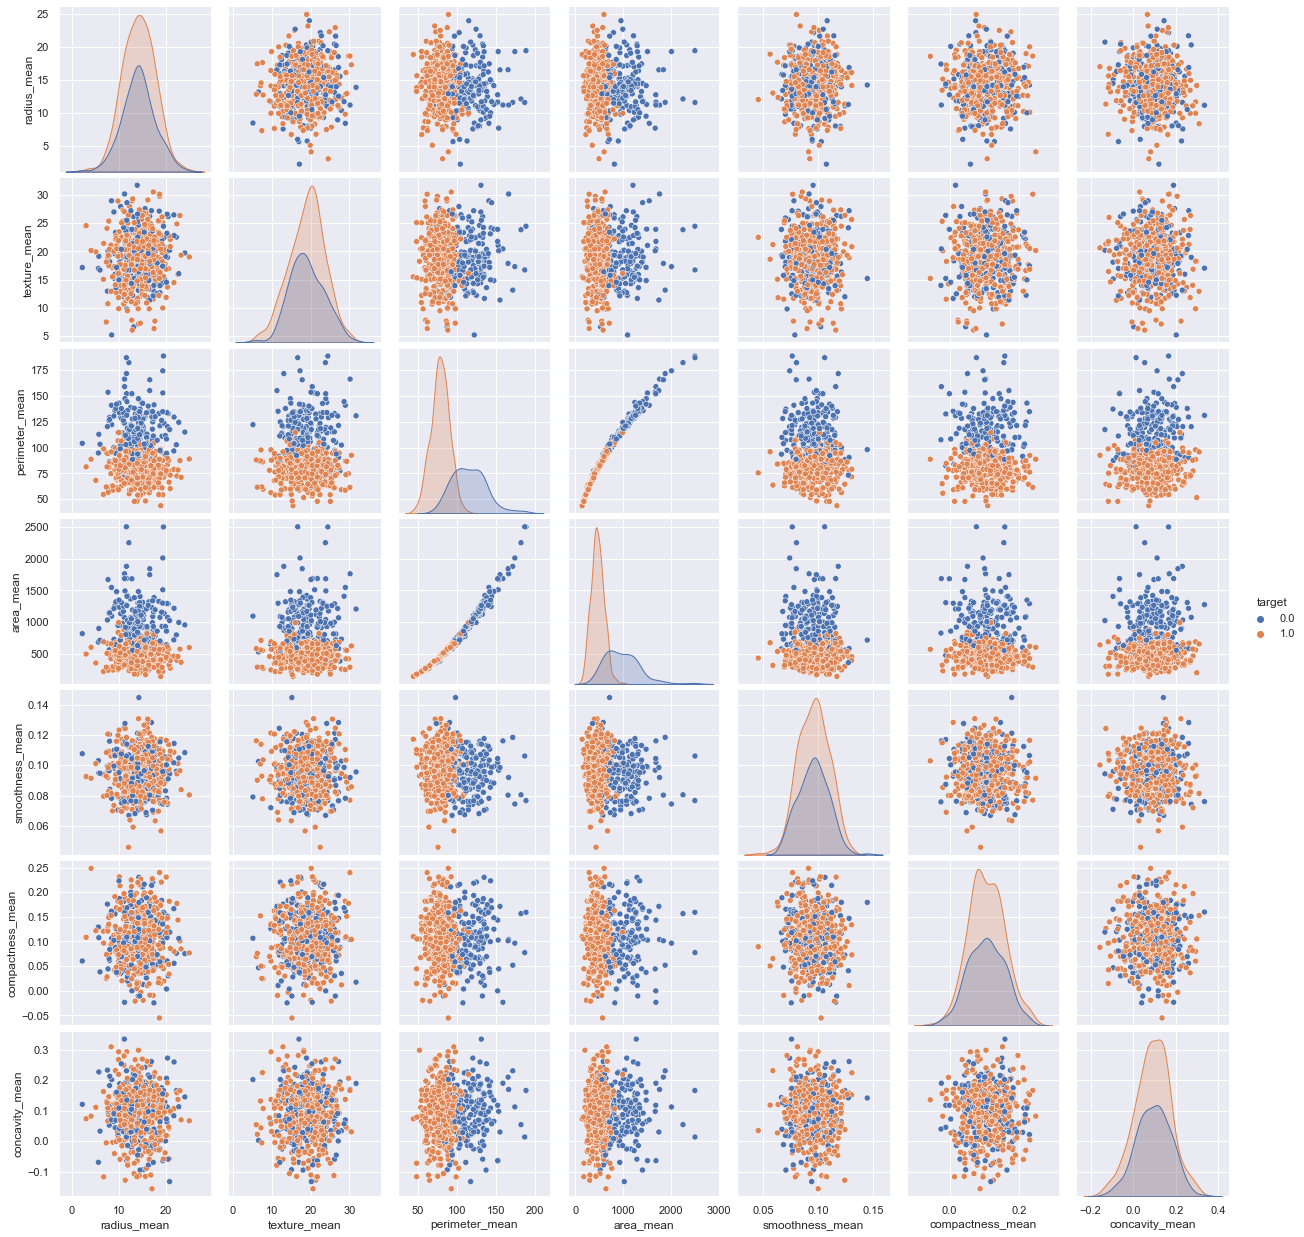

In [37]:
# pairplot of sample feature
sns.set()
plt.figure(figsize = (12,12))
sns.pairplot(Cancer_df, hue = 'target',vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean'])
plt.show()

C:\Users\karti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


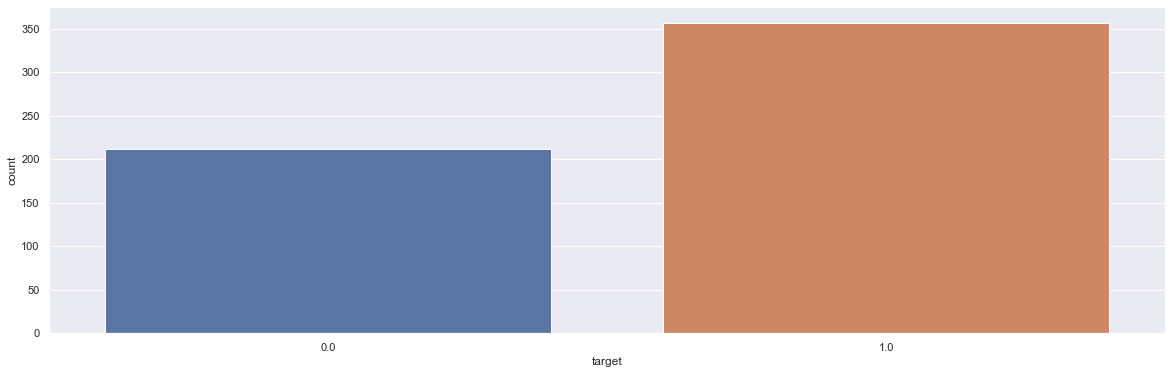

In [38]:
# Counterplot
#count the target
sns.set()
plt.figure(figsize = (20,6))
sns.countplot(Cancer_df['target'])
plt.show()

C:\Users\karti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


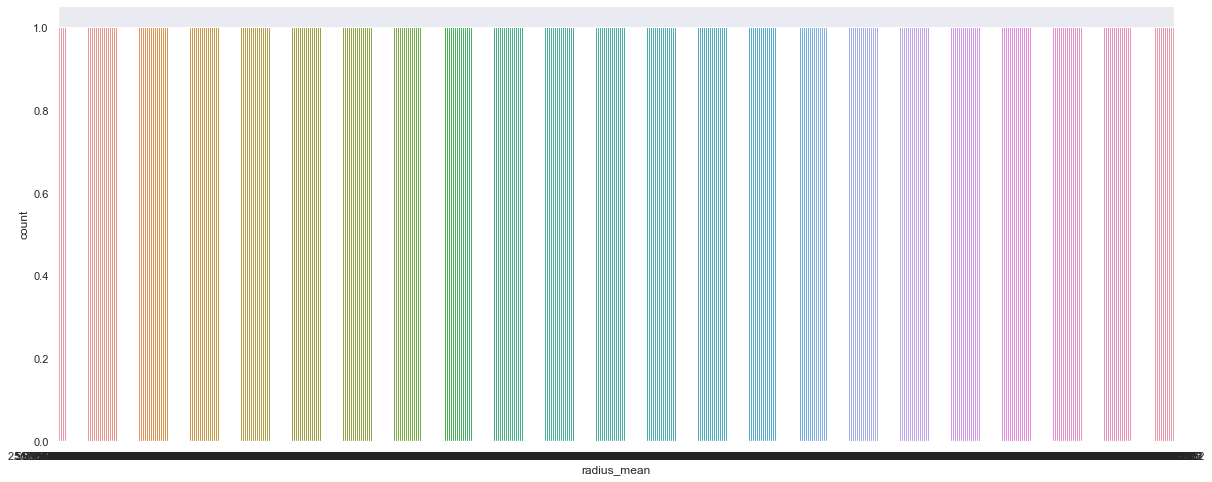

In [39]:
#counterplot of the feature mean radius
sns.set()
plt.figure(figsize = (20,8))
sns.countplot(Cancer_df['radius_mean'])
plt.show()

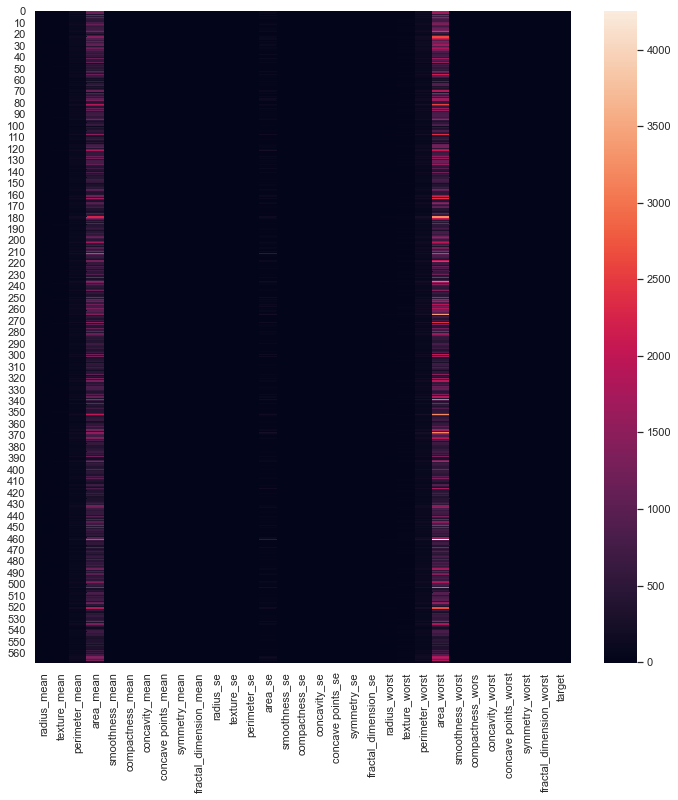

In [40]:
# Heatmap of Dataframe
sns.set()
plt.figure(figsize = (12,12))
sns.heatmap(Cancer_df)
plt.show()

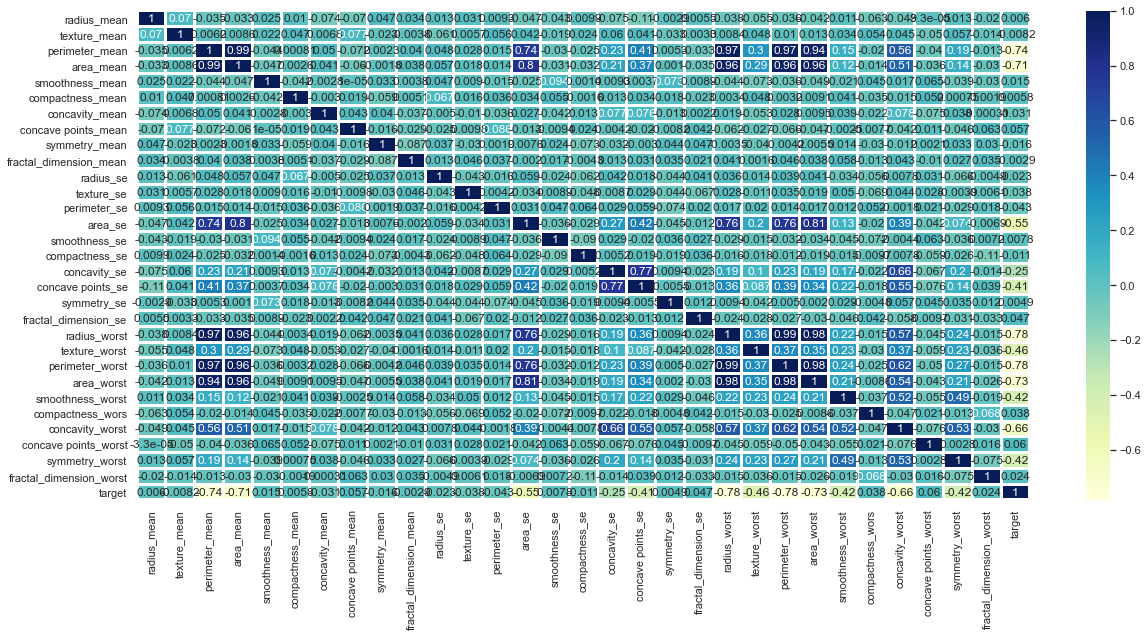

In [42]:
# heatmap of correlation matrix
sns.set()
plt.figure(figsize = (20,9))
corel = Cancer_df.corr()
sns.heatmap(corel, annot = True, xticklabels = corel.columns, yticklabels = corel.columns, cmap = 'YlGnBu', linewidth = 2)
plt.show()

In [43]:
#Correlation barplot
# create second dataframe by dropping target
Cancer_df2 = Cancer_df.drop(['target'], axis = 1)
print(Cancer_df2.shape)

(569, 30)


In [45]:
# Data preprocessing
#split the datafraame in train and test
#input variable
X = Cancer_df2
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [46]:
#output variable
y = Cancer_df['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [47]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [48]:
print(X_train.shape)

(455, 30)


In [49]:
print(X_test.shape)

(114, 30)


In [50]:
print(Cancer_df2.shape)

(569, 30)


In [51]:
#FEATURE SCALING
#loading Standard scaler function
scaler = StandardScaler()

In [52]:
#fitting and tranforming the data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [55]:
# Building machine learning model to detect the breast cancer

In [56]:
# SUPPORT VECTOR CLASSIFIER
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print("Accuracy score of Data with Support Vector Classifier - ", accuracy_score(y_test,y_pred_svc))

Accuracy score of Data with Support Vector Classifier -  0.9035087719298246


In [57]:
# Train with Standard Scaled Data
svc_classifier.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with Support Vector Classifier - ", accuracy_score(y_test, y_pred_svc_sc))

Accuracy score of Standard Scaled Data with Support Vector Classifier -  0.9649122807017544


In [58]:
# K-Nearest Neighbour Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print("Accuracy score of Data with K-Nearest Neighbour Classifier - ", accuracy_score(y_test, y_pred_knn))

Accuracy score of Data with K-Nearest Neighbour Classifier -  0.9035087719298246


In [59]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with K-Nearest Neighbour Classifier - ", accuracy_score(y_test, y_pred_knn_sc))

Accuracy score of Standard Scaled Data with K-Nearest Neighbour Classifier -  0.6052631578947368


In [60]:
# DECISION TREE CLASSIFIER
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 40)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print("Accuracy score of Data with Decision Tree Classifier - ", accuracy_score(y_test, y_pred_dt))

Accuracy score of Data with Decision Tree Classifier -  0.9122807017543859


In [61]:
# Train the Standard scaled Data
dt_classifier.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
print("Accuracy score of Standard Scaled Data with Decision Tree Classifier - ", accuracy_score(y_test, y_pred_dt_sc))

Accuracy score of Standard Scaled Data with Decision Tree Classifier -  0.9122807017543859
